In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("WKA2.csv", sep=';', usecols=[1,2])

In [3]:
df.head()

,Anzahl_betr_WKA,Leistung_MW
0,2173,3248
1,2222,3612
2,2564,4789
3,2759,5613
4,2923,6174


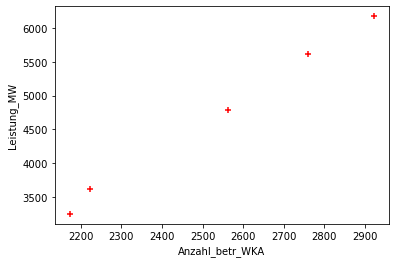

In [4]:
%matplotlib inline
plt.xlabel('Anzahl_betr_WKA')
plt.ylabel('Leistung_MW')
plt.scatter(df["Anzahl_betr_WKA"],df["Leistung_MW"],color='red',marker='+')

In [5]:
df["Leistung_MW"] # die veränderbare Größe

0    3248
1    3612
2    4789
3    5613
4    6174
Name: Leistung_MW, dtype: int64

In [6]:
df["Anzahl_betr_WKA"] # Feste Größe

0    2173
1    2222
2    2564
3    2759
4    2923
Name: Anzahl_betr_WKA, dtype: int64

In [7]:
X=df[["Anzahl_betr_WKA"]]

In [8]:
y=df["Leistung_MW"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [3.69396966]


In [15]:
print(lm.intercept_)

-4619.000358626664


In [16]:
predictions=lm.predict(X_test)  # prediction

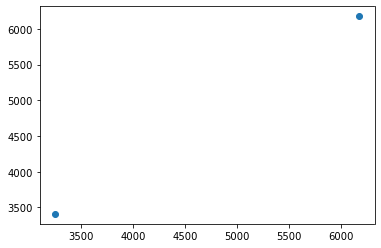

In [17]:
plt.scatter(y_test, predictions)

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82.23433207475728
MSE: 12809.317270655409
RMSE: 113.1782544071758


In [19]:
metrics.explained_variance_score(y_test, predictions)

0.9971748647551548

In [20]:
### Generate CSV file with list of home price predictions

In [21]:
Anzahl_betr_WKA_df = pd.read_csv("WKA3.csv")
Anzahl_betr_WKA_df.head(5)

,Anzahl_betr_WKA
0,500
1,1000
2,1500
3,2000
4,2500


In [22]:
p = lm.predict(Anzahl_betr_WKA_df)
p

array([-2772.01552921,  -925.0306998 ,   921.95412962,  2768.93895904,
        4615.92378845,  6462.90861787,  8309.89344728, 10156.8782767 ,
       12003.86310611, 13850.84793553, 15697.83276494, 17544.81759436,
       19391.80242377, 21238.78725319, 23085.77208261, 24932.75691202,
       26779.74174144, 28626.72657085, 30473.71140027, 32320.69622968])

In [23]:
Anzahl_betr_WKA_df['Leistung_MW']=p
Anzahl_betr_WKA_df

,Anzahl_betr_WKA,Leistung_MW
0,500,-2772.015529
1,1000,-925.030700
2,1500,921.954130
3,2000,2768.938959
4,2500,4615.923788
5,3000,6462.908618
6,3500,8309.893447
7,4000,10156.878277
8,4500,12003.863106
9,5000,13850.847936


In [24]:
Anzahl_betr_WKA_df.to_csv("wka_predict.csv")

In [25]:
df.Anzahl_betr_WKA

0    2173
1    2222
2    2564
3    2759
4    2923
Name: Anzahl_betr_WKA, dtype: int64

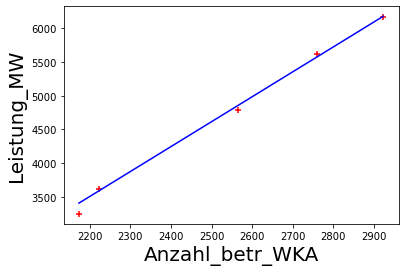

In [26]:
%matplotlib inline
plt.xlabel('Anzahl_betr_WKA', fontsize=20)
plt.ylabel('Leistung_MW', fontsize=20)
plt.scatter(df.Anzahl_betr_WKA,df.Leistung_MW,color='red',marker='+')
plt.plot(df.Anzahl_betr_WKA,lm.predict(X),color='blue')